In [30]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import glob

def tmx_to_csv(tmx_path: str, output_dir: str):
    base_name = os.path.splitext(os.path.basename(tmx_path))[0]
    csv_path = os.path.join(output_dir, f"{base_name}.csv")

    tree = ET.parse(tmx_path)
    root = tree.getroot()
    body = root.find('.//{*}body')

    if body is None:
        print(f"❌ Не найден <body> в {tmx_path}")
        return

    data = []
    for tu in body.findall('.//{*}tu'):
        tuv_elements = tu.findall('.//{*}tuv')
        if len(tuv_elements) < 2:
            continue

        lang1 = tuv_elements[0].attrib.get('{http://www.w3.org/XML/1998/namespace}lang')
        lang2 = tuv_elements[1].attrib.get('{http://www.w3.org/XML/1998/namespace}lang')

        seg1 = tuv_elements[0].find('.//{*}seg')
        seg2 = tuv_elements[1].find('.//{*}seg')

        text1 = ET.tostring(seg1, encoding='unicode', method='text').strip() if seg1 is not None else ''
        text2 = ET.tostring(seg2, encoding='unicode', method='text').strip() if seg2 is not None else ''

        # Извлекаем creationdate, changedate и client
        creationdate = tu.attrib.get("creationdate", "")
        changedate = tu.attrib.get("changedate", "")
        client = ""
        for prop in tu.findall('.//{*}prop'):
            if prop.attrib.get('type') == 'client':
                client = prop.text or ''
                break

        if lang1 and lang2 and text1 and text2:
            data.append({
                lang1: text1,
                lang2: text2,
                'creationdate': creationdate,
                'changedate': changedate,
                'client': client
            })

    if not data:
        print(f"⚠ В TMX-файле {tmx_path} не найдено пар переводов.")
        return

    df = pd.DataFrame(data)
    df.to_csv(csv_path, index=False, encoding='utf-8')
    print(f"✔ Сохранён CSV: {csv_path}")


def convert_all_tmx_in_folder(folder_path: str):
    # Создание папки для CSV
    output_dir = f"{folder_path.rstrip(os.sep)}_csv"
    os.makedirs(output_dir, exist_ok=True)

    tmx_files = glob.glob(os.path.join(folder_path, "*.tmx"))
    if not tmx_files:
        print("❌ TMX-файлы не найдены.")
        return

    for tmx_path in tmx_files:
        tmx_to_csv(tmx_path, output_dir)

    # Объединение всех CSV
    all_csv_files = glob.glob(os.path.join(output_dir, "*.csv"))
    all_dfs = []
    for csv_file in all_csv_files:
        df = pd.read_csv(csv_file)
        all_dfs.append(df)

    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        folder_name = os.path.basename(folder_path.rstrip(os.sep))
        combined_csv_path = os.path.join(output_dir, f"{folder_name}.csv")
        combined_df.to_csv(combined_csv_path, index=False, encoding='utf-8')
        print(f"📁 Объединённый CSV сохранён: {combined_csv_path}")
    else:
        print("⚠ Нет данных для объединения.")

In [14]:
convert_all_tmx_in_folder(r'C:\Users\Iriniya\Desktop\тематики_перевод\ЮРИД GMP')

✔ Сохранён CSV: C:\Users\Iriniya\Desktop\тематики_перевод\ЮРИД GMP_csv\138342_юр GSK Master TM.csv
📁 Объединённый CSV сохранён: C:\Users\Iriniya\Desktop\тематики_перевод\ЮРИД GMP_csv\ЮРИД GMP.csv


In [2]:
import os
import pandas as pd

def swap_en_ru_columns(csv_path: str):
    # Загружаем CSV в DataFrame
    df = pd.read_csv(csv_path)

    if 'en' in df.columns and 'ru' in df.columns:
        cols = list(df.columns)
        en_idx = cols.index('en')
        ru_idx = cols.index('ru')
        cols[en_idx], cols[ru_idx] = cols[ru_idx], cols[en_idx]
        df = df[cols]

        # Формируем новое имя файла с суффиксом _converted
        base, ext = os.path.splitext(csv_path)
        new_csv_path = f"{base}_converted{ext}"

        df.to_csv(new_csv_path, index=False, encoding='utf-8')
        print(f"✔ Колонки 'en' и 'ru' поменяны местами и сохранены в {new_csv_path}")
    else:
        print("❌ В файле нет одной или обеих колонок 'en' и 'ru'.")

# Пример использования
swap_en_ru_columns(r'C:\Users\Iriniya\Desktop\данные_очищ\cleaned_data_not_appr.csv')

❌ В файле нет одной или обеих колонок 'en' и 'ru'.


In [12]:
import pandas as pd

csv_path = r'C:\Users\Iriniya\Desktop\Базы_обучение\ru-en_csv\ru-en_converted.csv'  # Замени на реальный путь
df = pd.read_csv(csv_path, low_memory=False)

# Количество колонок
num_columns = len(df.columns)
print(f"Количество колонок: {num_columns}")

# Названия колонок
print("Названия колонок:")
for col in df.columns:
    print(col)

Количество колонок: 10
Названия колонок:
en
ru
creationdate
changedate
client
de
fr
it
uk
uz-Latn-UZ


In [40]:
import pandas as pd

# Укажи путь к файлу
csv_path = r'C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\edited\all_edited.csv'

# Загружаем CSV
df = pd.read_csv(csv_path)

# Оставляем только нужные столбцы (если они есть)
columns_to_keep = ['en', 'ru', 'creationdate', 'changedate', 'client']
existing_columns = [col for col in columns_to_keep if col in df.columns]
df_cleaned = df[existing_columns]

# Сохраняем очищенный файл
output_path = csv_path.replace('.csv', '_cleaned.csv')
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"✔ Сохранён очищенный CSV: {output_path}")

C:\Users\Iriniya\AppData\Local\Temp\ipykernel_22244\362143572.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✔ Сохранён очищенный CSV: C:\Users\Iriniya\Desktop\Базы_обучение\final\train1\all_edited_cleaned.csv


In [9]:
import os
import glob
import pandas as pd

def combine_csv_in_folder(folder_path: str, output_name: str = "combined.csv"):
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    if not csv_files:
        print(f"❌ В папке {folder_path} не найдено CSV-файлов.")
        return

    combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
    output_path = os.path.join(folder_path, output_name)
    combined_df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"✅ Объединённый CSV сохранён: {output_path}")

In [10]:
combine_csv_in_folder(r"C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\duple_rem\cleaned")

✅ Объединённый CSV сохранён: C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\duple_rem\cleaned\combined.csv


In [32]:
import pandas as pd

def remove_duplicate_rows(csv_path: str, output_path: str):
    df = pd.read_csv(csv_path)

    # Удаляем дубликаты по столбцам 'en' и 'ru', оставляя первую запись
    df_unique = df.drop_duplicates(subset=['en', 'ru'], keep='first')

    # Сохраняем результат
    df_unique.to_csv(output_path, index=False, encoding='utf-8')
    print(f"✔ Сохранён CSV без дубликатов: {output_path}")

# Пример использования:
csv_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\патенты_сколково\патенты_сколково1.csv'
output_path = csv_path.replace('.csv', '_dedup.csv')
remove_duplicate_rows(csv_path, output_path)

✔ Сохранён CSV без дубликатов: C:\Users\Iriniya\Desktop\тематики_перевод\патенты_сколково\патенты_сколково1_dedup.csv


In [3]:
import pandas as pd
import os

def split_and_remove_before_2019(csv_path: str):
    df = pd.read_csv(csv_path)
    
    df['creationdate'] = pd.to_datetime(df['creationdate'], format='%Y%m%dT%H%M%SZ', errors='coerce')
    
    cutoff_date = pd.Timestamp('2019-01-01')
    
    df_before = df[df['creationdate'] < cutoff_date]
    df_after = df[df['creationdate'] >= cutoff_date]
    
    base, ext = os.path.splitext(csv_path)
    
    if not df_before.empty:
        before_path = f"{base}_before2019{ext}"
        df_before.to_csv(before_path, index=False, encoding='utf-8')
        print(f"Сохранён файл с данными до 2019: {before_path}")
    else:
        print("Нет строк с creationdate раньше 01.01.2019")
        
    # Перезаписываем исходный файл, убрав старые строки
    df_after.to_csv(csv_path, index=False, encoding='utf-8')
    print(f"Исходный файл обновлён, строки до 2019 удалены: {csv_path}")

# Использование
csv_path = r'C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\edited\all_edited.csv'
split_and_remove_before_2019(csv_path)

C:\Users\Iriniya\AppData\Local\Temp\ipykernel_17492\867994896.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Сохранён файл с данными до 2019: C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\edited\all_edited_before2019.csv
Исходный файл обновлён, строки до 2019 удалены: C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\edited\all_edited.csv


In [8]:
import pandas as pd

def add_approved_column(csv_path: str):
    df = pd.read_csv(csv_path)
    df['approved by editor'] = 'no'
    df.to_csv(csv_path, index=False, encoding='utf-8')
    print(f"✔ Колонка 'approved by editor' добавлена со значением 'no': {csv_path}")

# Пример использования:
csv_path = r'C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\unedited\unedited_old.csv'
add_approved_column(csv_path)

✔ Колонка 'approved by editor' добавлена со значением 'no': C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\unedited\unedited_old.csv


In [4]:
import pandas as pd

def remove_duplicates_prioritize_approved(csv_path: str):
    df = pd.read_csv(csv_path)

    # Группируем по колонкам en и ru
    def keep_preferred(group):
        # Если есть хотя бы одна строка с approved == 'yes', вернём её
        approved = group[group['approved by editor'] == 'yes']
        if not approved.empty:
            return approved.iloc[[0]]
        else:
            return group.iloc[[0]]  # Иначе возвращаем первую строку из группы

    deduplicated_df = df.groupby(['en', 'ru'], group_keys=False).apply(keep_preferred)

    # Сохраняем результат
    output_path = csv_path.replace('.csv', '_deduplicated.csv')
    deduplicated_df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"✔ Файл с удалёнными дубликатами сохранён: {output_path}")

# Пример использования
csv_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\фарма_Маша_Иван_csv\фарма_Маша_Иван_cleaned.csv'
remove_duplicates_prioritize_approved(csv_path)

KeyError: 'approved by editor'

In [12]:
import pandas as pd
import os

def move_not_approved_rows(csv_path: str):
    df = pd.read_csv(csv_path)

    # Фильтруем строки, где "approved by editor" == "no"
    not_approved = df[df['approved by editor'] == 'no']
    approved_only = df[df['approved by editor'] != 'no']

    # Сохраняем строки с "no" в отдельный файл
    base, ext = os.path.splitext(csv_path)
    not_approved_path = f"{base}_not_approved{ext}"
    not_approved.to_csv(not_approved_path, index=False, encoding='utf-8')
    print(f"❗ Строки с 'no' сохранены в: {not_approved_path}")

    # Перезаписываем исходный файл без строк с "no"
    approved_only.to_csv(csv_path, index=False, encoding='utf-8')
    print(f"✔ Исходный CSV обновлён: строки с 'no' удалены.")

# Пример использования
csv_path = r'C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\duple_rem\combined_deduplicated.csv'
move_not_approved_rows(csv_path)

❗ Строки с 'no' сохранены в: C:\Users\Iriniya\Documents\Обучение_Marian\Базы_обучение\final\duple_rem\combined_deduplicated_not_approved.csv
✔ Исходный CSV обновлён: строки с 'no' удалены.


In [15]:
import pandas as pd

# Укажи путь к файлу
csv_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\ЮРИД GMP\ЮРИД GMP.csv'

# Загружаем CSV
df = pd.read_csv(csv_path)

# Оставляем только нужные столбцы (если они есть)
columns_to_keep = ['en', 'ru']
existing_columns = [col for col in columns_to_keep if col in df.columns]
df_cleaned = df[existing_columns]

# Сохраняем очищенный файл
output_path = csv_path.replace('.csv', '_cleaned1.csv')
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"✔ Сохранён очищенный CSV: {output_path}")

✔ Сохранён очищенный CSV: C:\Users\Iriniya\Desktop\тематики_перевод\ЮРИД GMP\ЮРИД GMP_cleaned1.csv


In [3]:
import pandas as pd

# Пути к файлам
reference_path = r'C:\Users\Iriniya\Desktop\137916_сравнение_csv\137916_эталон.csv'           # CSV с правильным порядком (эталон)
mt_path = r'C:\Users\Iriniya\Desktop\137916_сравнение_csv\137916_МП_Медконсалт.csv'          # CSV с машинными переводами (в любом порядке)
output_path = r'C:\Users\Iriniya\Desktop\137916_сравнение_csv\137916_МП_Медконсалт_sorted.csv'  # Куда сохранить результат

# Загрузка файлов
ref_df = pd.read_csv(reference_path)
mt_df = pd.read_csv(mt_path)

# Проверка, что столбец 'en' есть в обоих
assert 'en' in ref_df.columns, "'en' не найден в эталонном файле"
assert 'en' in mt_df.columns, "'en' не найден в машинном переводе"

# Удаление дубликатов по 'en' (на всякий случай)
mt_df = mt_df.drop_duplicates(subset='en')

# Объединение по 'en', чтобы упорядочить строки
merged_df = pd.merge(ref_df[['en']], mt_df, on='en', how='left')

# Сохранение отсортированного результата
merged_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"Файл сохранён: {output_path}")

Файл сохранён: C:\Users\Iriniya\Desktop\137916_сравнение_csv\137916_МП_Медконсалт_sorted.csv


In [27]:
import pandas as pd

# Укажи путь к файлу
csv_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\клин_исслед\клин_исслед_csv\клин_исслед1_cleaned_dedup.csv'

# Загружаем CSV
df = pd.read_csv(csv_path)

# Оставляем только нужные столбцы (если они есть)
columns_to_keep = ['en', 'ru']
existing_columns = [col for col in columns_to_keep if col in df.columns]
df_cleaned = df[existing_columns]

# Сохраняем очищенный файл
output_path = csv_path.replace('.csv', '_cleaned.csv')
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"✔ Сохранён очищенный CSV: {output_path}")

✔ Сохранён очищенный CSV: C:\Users\Iriniya\Desktop\тематики_перевод\клин_исслед\клин_исслед_csv\клин_исслед1_cleaned_dedup_cleaned.csv


In [14]:
import pandas as pd
import re
import csv
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# === 1. Пути к файлам ===
dataset_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\фарма_Маша_Иван_csv\human_evaluation_pharma_cleaned.csv'
terms_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\фарма_Маша_Иван_csv\terms_cleaned.csv'

# === 2. Загрузка данных ===
df = pd.read_csv(dataset_path)
terms_df = pd.read_csv(terms_path, header=None)
terms = set(term.strip().lower() for term in terms_df[0] if isinstance(term, str))

# === 3. Предобработка ===
def count_terms(text, term_list):
    text_lower = text.lower()
    return sum(1 for term in term_list if term in text_lower)

def estimate_syntax_complexity(text):
    score = 0
    score += text.count(",") + text.count(";")
    score += len(re.findall(r"\b(and|or|but|that|which|because|although|however|while|of)\b", text.lower()))
    return score

df["length"] = df["en"].str.split().str.len()
df["term_count"] = df["en"].apply(lambda x: count_terms(str(x), terms))
df["complexity_score"] = df["en"].apply(lambda x: estimate_syntax_complexity(str(x)))

# === 4. Группировка и выборка ===
short = df[df["length"] <= 7]
medium = df[(df["length"] > 7) & (df["length"] <= 15)]
long = df[df["length"] > 15]

def sample_sorted(group, n):
    return group.sort_values(
        by=["term_count", "complexity_score", "length"],
        ascending=[False, False, False]
    ).head(n)

# 📌 Обновлённое распределение
sample_short = sample_sorted(short, 30)     # Увеличено с 20 → 30
sample_medium = sample_sorted(medium, 30)
sample_long = sample_sorted(long, 40)       # Уменьшено с 50 → 40

final_sample = pd.concat([sample_short, sample_medium, sample_long])
final_sample = final_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# === 5. Добавляем поля для оценки
final_sample["score_editor_1"] = ""
final_sample["score_editor_2"] = ""
final_sample["average_score"] = "=IF(AND(ISNUMBER(F2), ISNUMBER(G2)), (F2+G2)/2, \"\")"
final_sample["comment"] = ""

# === 6. Сохраняем в CSV
csv_path = r'C:\Users\Iriniya\Desktop\тематики_перевод\фарма_Маша_Иван_csv\human_eval_clean.csv'
columns = ["en", "ru", "length", "term_count", "complexity_score",
           "score_editor_1", "score_editor_2", "average_score", "comment"]

final_sample.to_csv(
    csv_path,
    index=False,
    columns=columns,
    encoding='utf-8-sig',
    quoting=csv.QUOTE_ALL,
    quotechar='"'
)

# === 7. Сохраняем в Excel (без форматирования)
excel_path = csv_path.replace(".csv", ".xlsx")
wb = Workbook()
ws = wb.active
ws.title = "Human Evaluation"

for r in dataframe_to_rows(final_sample[columns], index=False, header=True):
    ws.append(r)

wb.save(excel_path)

print(f"✅ CSV сохранён: {csv_path}")
print(f"📘 Excel-файл без форматирования сохранён: {excel_path}")



✅ CSV сохранён: C:\Users\Iriniya\Desktop\тематики_перевод\фарма_Маша_Иван_csv\human_eval_clean.csv
📘 Excel-файл без форматирования сохранён: C:\Users\Iriniya\Desktop\тематики_перевод\фарма_Маша_Иван_csv\human_eval_clean.xlsx


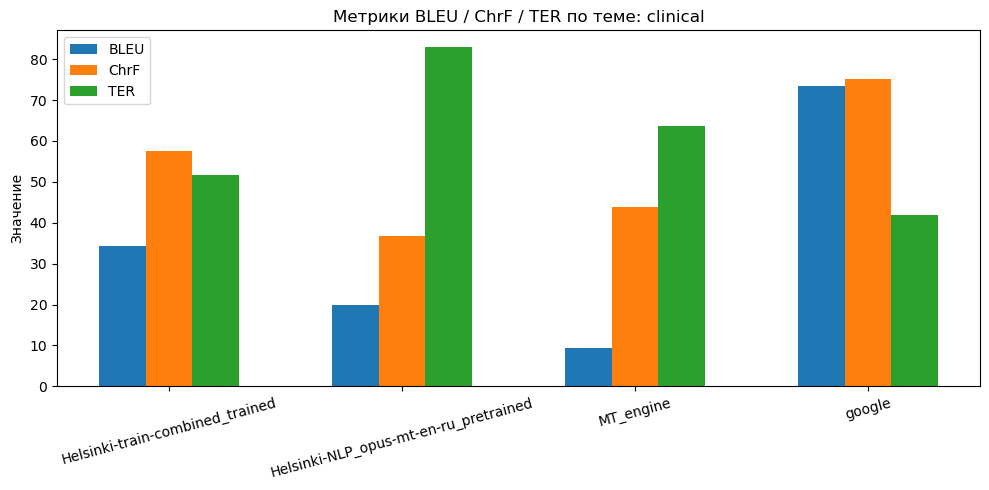

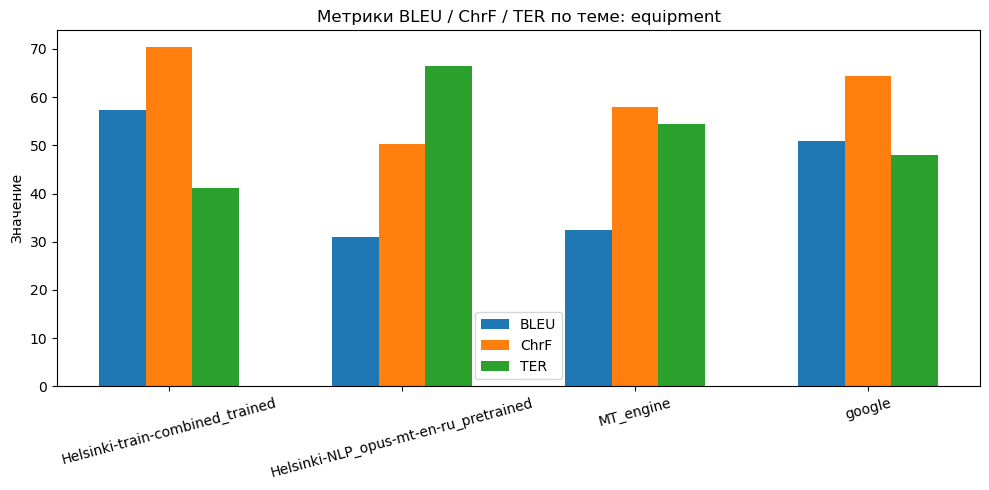

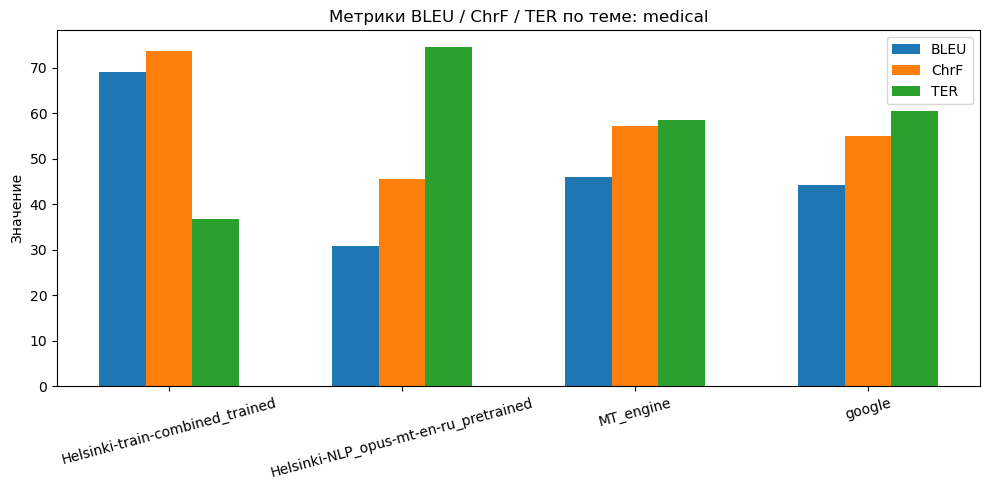

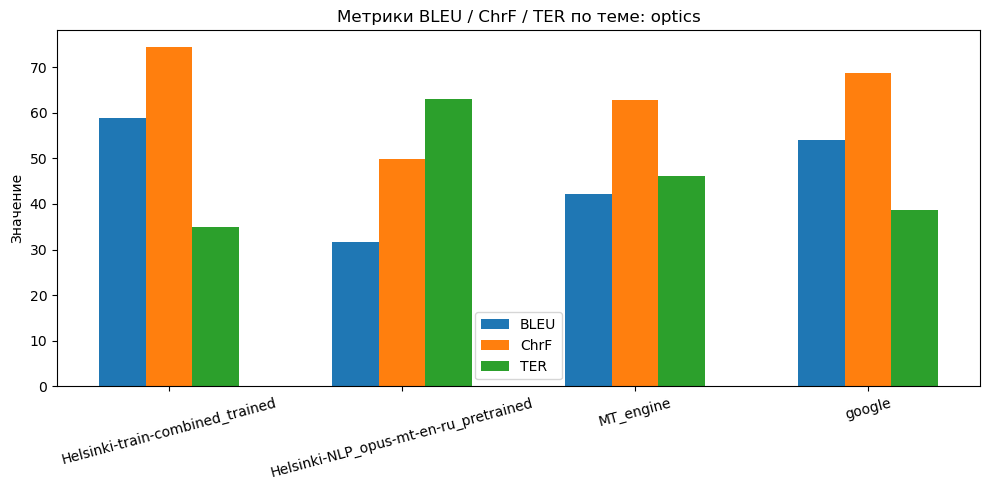

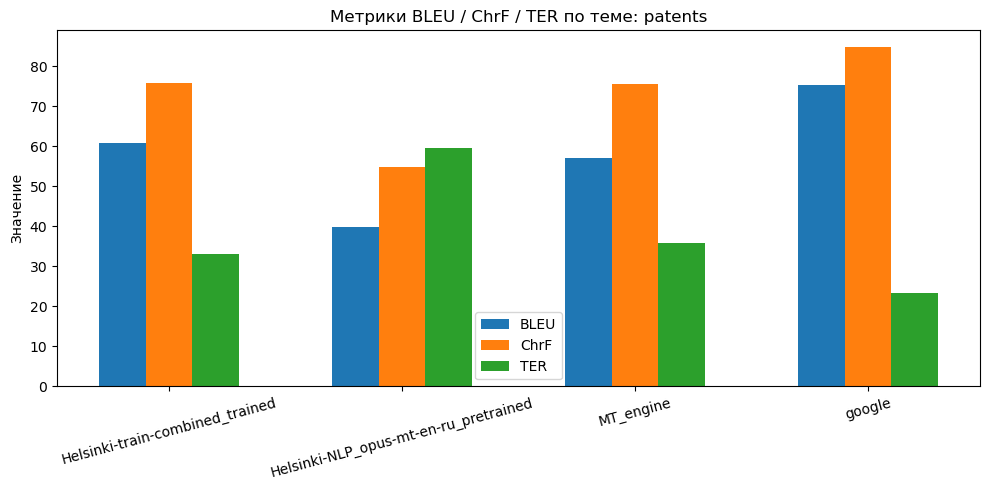

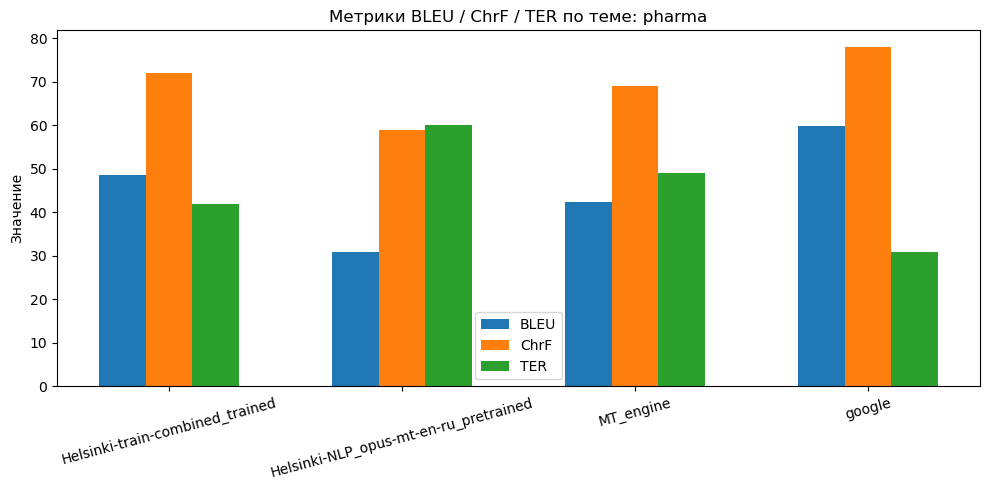

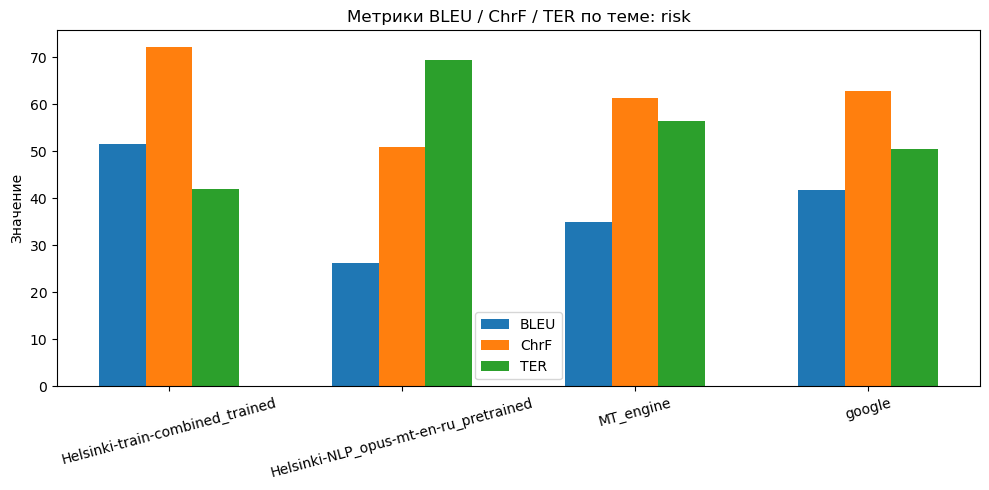

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import evaluate

# === 1. Загрузка файла ===
df = pd.read_excel(r'C:\Users\Iriniya\Desktop\тематики_перевод\combined_sample_3500_main_090725.xlsx')


systems = [
    "Helsinki-train-combined_trained",
    "Helsinki-NLP_opus-mt-en-ru_pretrained",
    "MT_engine",
    "google"
]

# Метрики
bleu = evaluate.load("sacrebleu")
chrf = evaluate.load("chrf")
ter = evaluate.load("ter")

results_by_topic = {}

for topic, group in df.groupby("topic"):
    refs = group["ru"].astype(str).tolist()
    results_by_topic[topic] = {}
    for sys in systems:
        preds = group[sys].astype(str).tolist()
        results_by_topic[topic][sys] = {
            "BLEU": bleu.compute(predictions=preds, references=refs)["score"],
            "ChrF": chrf.compute(predictions=preds, references=refs)["score"],
            "TER": ter.compute(predictions=preds, references=refs)["score"]
        }

# Визуализация
for topic in results_by_topic:
    metrics = ["BLEU", "ChrF", "TER"]
    width = 0.2
    x = range(len(systems))
    plt.figure(figsize=(10, 5))
    for i, metric in enumerate(metrics):
        values = [results_by_topic[topic][sys][metric] for sys in systems]
        plt.bar([xi + i * width for xi in x], values, width=width, label=metric)
    plt.xticks([xi + width for xi in x], systems, rotation=15)
    plt.title(f"Метрики BLEU / ChrF / TER по теме: {topic}", fontsize=12)
    plt.ylabel("Значение")
    plt.legend()
    plt.tight_layout()
    plt.show()

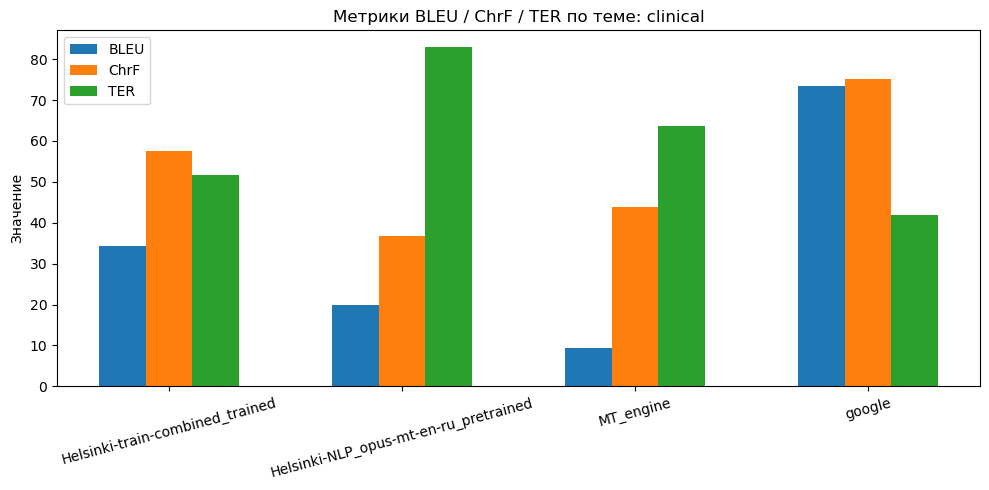

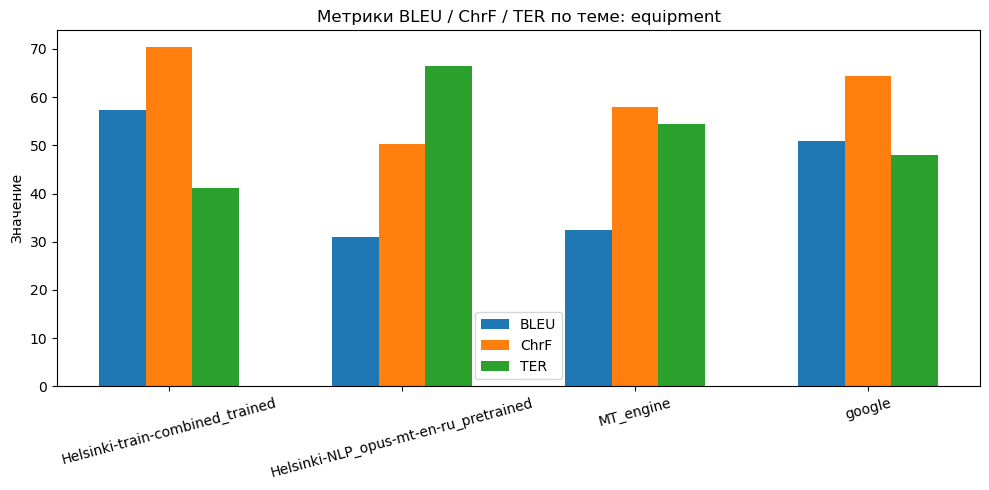

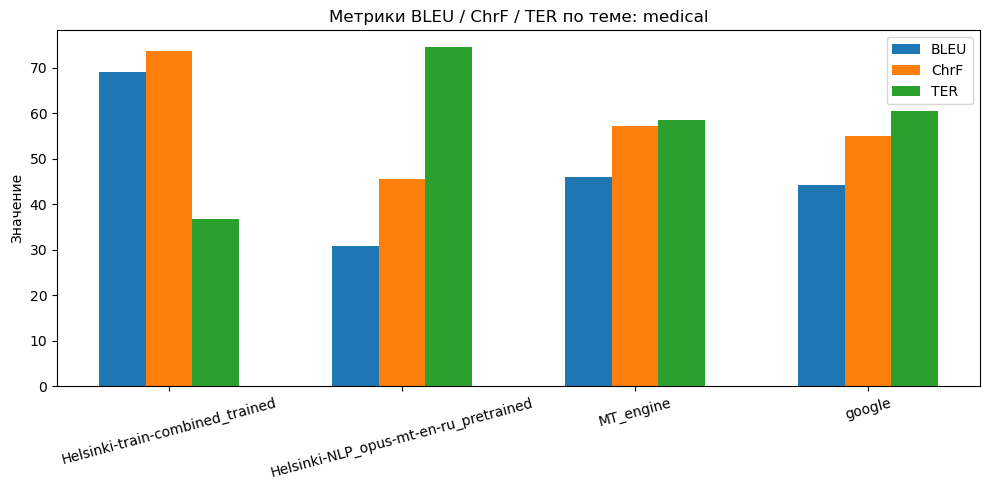

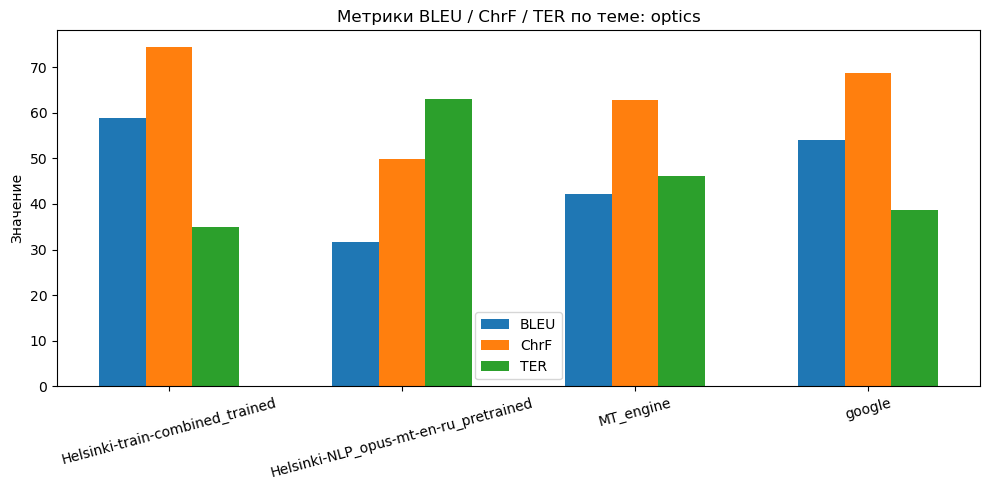

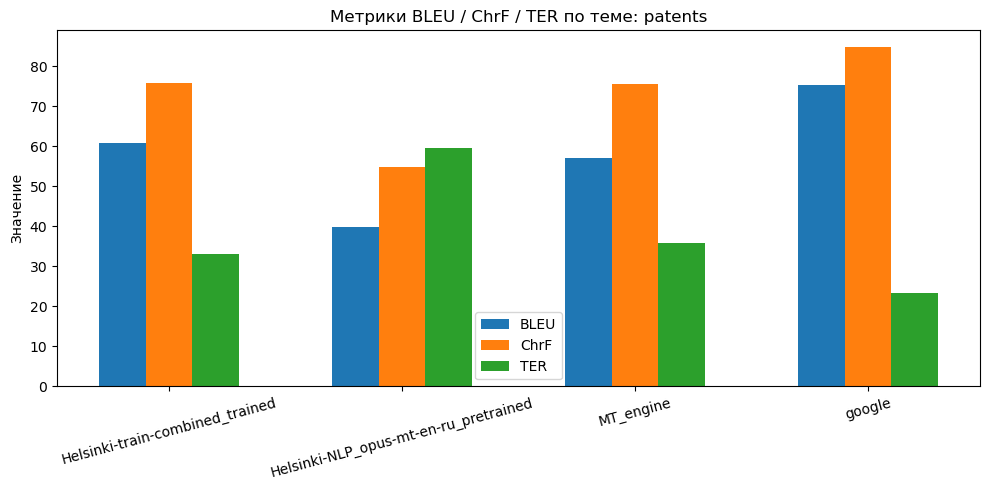

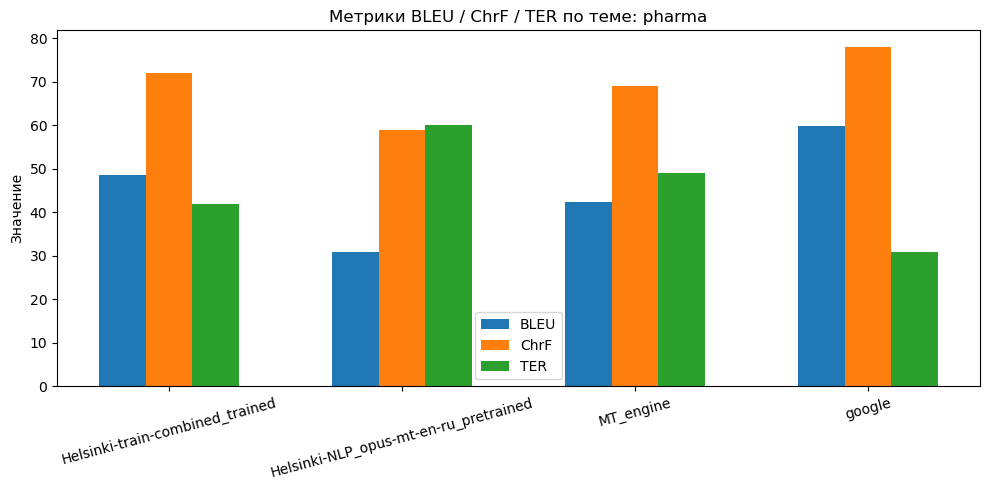

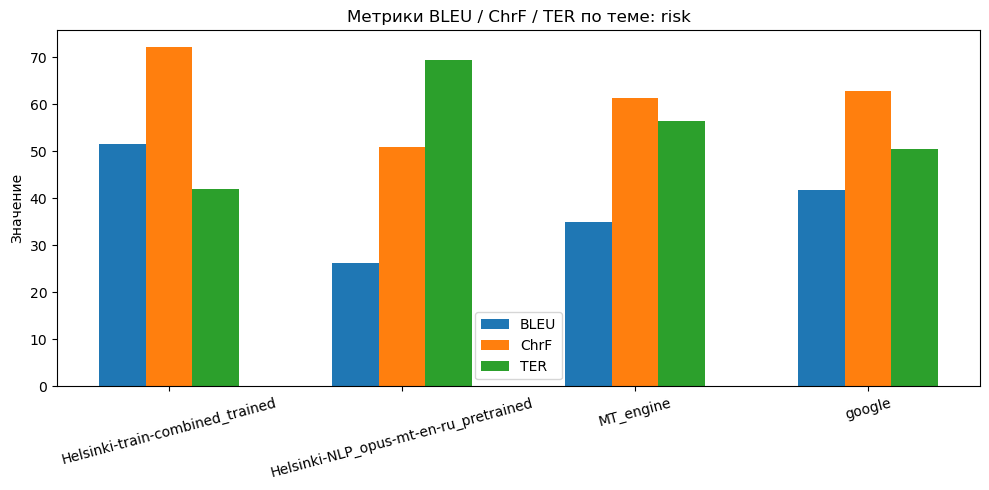

,topic,system,BLEU,ChrF,TER
0,clinical,Helsinki-train-combined_trained,34.305564,57.545408,51.692396
1,clinical,Helsinki-NLP_opus-mt-en-ru_pretrained,19.919311,36.856346,82.913031
2,clinical,MT_engine,9.394508,43.881847,63.706971
3,clinical,google,73.328790,75.076023,41.864033
4,equipment,Helsinki-train-combined_trained,57.272087,70.329734,41.123800
5,equipment,Helsinki-NLP_opus-mt-en-ru_pretrained,30.969082,50.269547,66.428757
6,equipment,MT_engine,32.508789,57.989570,54.515962
7,equipment,google,50.808802,64.349803,47.923696
8,medical,Helsinki-train-combined_trained,69.055196,73.674133,36.811594
9,medical,Helsinki-NLP_opus-mt-en-ru_pretrained,30.898682,45.668396,74.505929


In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import evaluate

# === 0. Путь сохранения ===
save_dir = r"C:\Users\Iriniya\Desktop\тематики_перевод\results"
os.makedirs(save_dir, exist_ok=True)

# === 1. Загрузка файла ===
df = pd.read_excel(r'C:\Users\Iriniya\Desktop\тематики_перевод\combined_sample_3500_main_090725.xlsx')


systems = [
    "Helsinki-train-combined_trained",
    "Helsinki-NLP_opus-mt-en-ru_pretrained",
    "MT_engine",
    "google"
]
# === 2. Системы перевода ===
systems = [
    "Helsinki-train-combined_trained",
    "Helsinki-NLP_opus-mt-en-ru_pretrained",
    "MT_engine",
    "google"
]

# === 3. Метрики ===
bleu = evaluate.load("sacrebleu")
chrf = evaluate.load("chrf")
ter = evaluate.load("ter")

# === 4. Расчёт метрик по каждой теме ===
results_by_topic = {}

for topic, group in df.groupby("topic"):
    refs = group["ru"].astype(str).tolist()
    results_by_topic[topic] = {}
    for sys in systems:
        preds = group[sys].astype(str).tolist()
        results_by_topic[topic][sys] = {
            "BLEU": bleu.compute(predictions=preds, references=refs)["score"],
            "ChrF": chrf.compute(predictions=preds, references=refs)["score"],
            "TER": ter.compute(predictions=preds, references=refs)["score"]
        }

# === 5. Визуализация (по теме) ===
for topic in results_by_topic:
    metrics = ["BLEU", "ChrF", "TER"]
    width = 0.2
    x = range(len(systems))
    plt.figure(figsize=(10, 5))
    for i, metric in enumerate(metrics):
        values = [results_by_topic[topic][sys][metric] for sys in systems]
        plt.bar([xi + i * width for xi in x], values, width=width, label=metric)
    plt.xticks([xi + width for xi in x], systems, rotation=15)
    plt.title(f"Метрики BLEU / ChrF / TER по теме: {topic}", fontsize=12)
    plt.ylabel("Значение")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === 6. Создание полной таблицы ===
rows = []
for topic, systems_scores in results_by_topic.items():
    for system, scores in systems_scores.items():
        row = {
            "topic": topic,
            "system": system,
            "BLEU": scores["BLEU"],
            "ChrF": scores["ChrF"],
            "TER": scores["TER"]
        }
        rows.append(row)

full_results_df = pd.DataFrame(rows)

# Показать итоговую таблицу
display(full_results_df)

# Сохранить (по желанию)
# full_results_df.to_excel("evaluation_results_by_topic.xlsx", index=False)

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import evaluate
import math

# === 1. Загрузка файла ===
df = pd.read_excel(r'C:\Users\Iriniya\Desktop\тематики_перевод\combined_sample_3500_main_090725.xlsx')
systems = [
    "Helsinki-train-combined_trained",
    "Helsinki-NLP_opus-mt-en-ru_pretrained",
    "MT_engine",
    "google"
]

bleu = evaluate.load("sacrebleu")
chrf = evaluate.load("chrf")
ter = evaluate.load("ter")

# === 2. Расчёт метрик по тематикам ===
results_by_topic = {}

for topic, group in df.groupby("topic"):
    refs = group["ru"].astype(str).tolist()
    results_by_topic[topic] = {}
    for sys in systems:
        preds = group[sys].astype(str).tolist()
        results_by_topic[topic][sys] = {
            "BLEU": bleu.compute(predictions=preds, references=refs)["score"],
            "ChrF": chrf.compute(predictions=preds, references=refs)["score"],
            "TER": ter.compute(predictions=preds, references=refs)["score"]
        }

# === 3. Построение одной общей картинки ===
metrics = ["BLEU", "ChrF", "TER"]
width = 0.2
topics = list(results_by_topic.keys())
num_topics = len(topics)
cols = 2
rows = math.ceil(num_topics / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axs = axs.flatten()

for idx, topic in enumerate(topics):
    ax = axs[idx]
    x = range(len(systems))
    for i, metric in enumerate(metrics):
        values = [results_by_topic[topic][sys][metric] for sys in systems]
        ax.bar([xi + i * width for xi in x], values, width=width, label=metric)
    ax.set_title(f"{topic}", fontsize=11)
    ax.set_xticks([xi + width for xi in x])
    ax.set_xticklabels(systems, rotation=15)
    ax.set_ylabel("Score")
    ax.legend()

# Удалить пустые графики
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Метрики BLEU / ChrF / TER по всем тематикам", fontsize=14, y=1.02)
plt.subplots_adjust(top=0.92)

# === 4. Сохранение как PNG ===
plt.savefig("all_topics_metrics.png", dpi=300)
plt.show()

# === 5. Формирование и вывод таблицы ===
rows = []
for topic, systems_scores in results_by_topic.items():
    for system, scores in systems_scores.items():
        rows.append({
            "topic": topic,
            "system": system,
            "BLEU": scores["BLEU"],
            "ChrF": scores["ChrF"],
            "TER": scores["TER"]
        })

results_df = pd.DataFrame(rows)
display(results_df)

# сохранить таблицу
results_df.to_excel("evaluation_results_by_topic.xlsx", index=False)

KeyError: 'Helsinki-train-combined_trained'

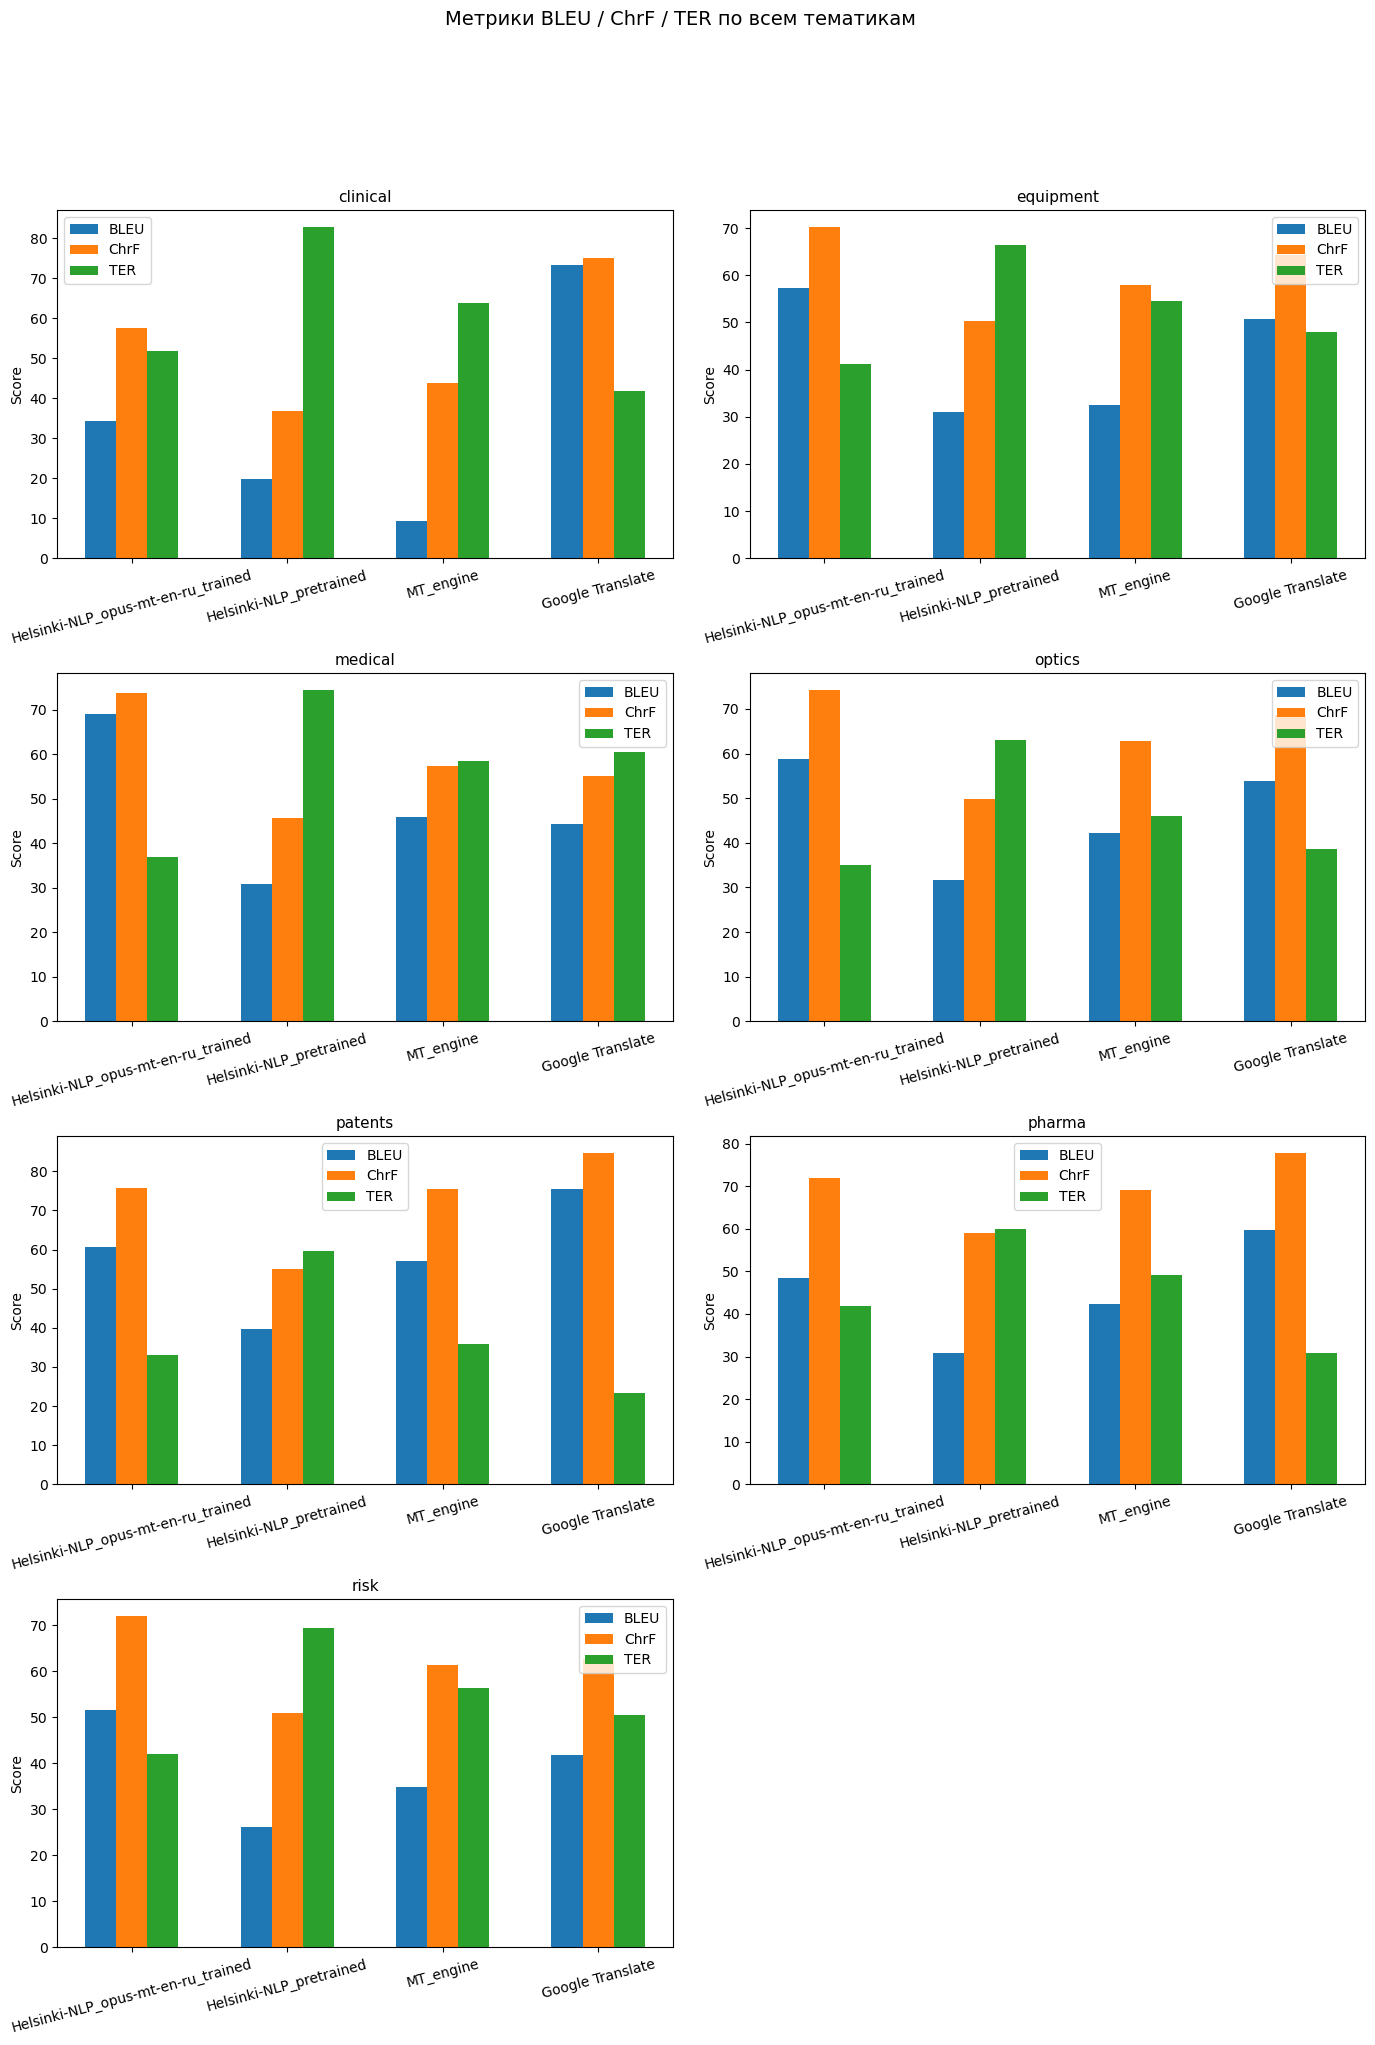

✅ Всё сохранено:
📘 Таблица: C:\Users\Iriniya\Desktop\тематики_перевод\results\evaluation_results_by_topic.xlsx
🖼️ График:  C:\Users\Iriniya\Desktop\тематики_перевод\results\all_topics_metrics.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import evaluate
import math
import os

# === 0. Путь сохранения ===
save_dir = r"C:\Users\Iriniya\Desktop\тематики_перевод\results"
os.makedirs(save_dir, exist_ok=True)

# === 1. Загрузка данных ===
df = pd.read_excel(r'C:\Users\Iriniya\Desktop\тематики_перевод\combined_sample_3500_main_090725.xlsx')

systems = [
    "Helsinki-NLP_opus-mt-en-ru_trained",
    "Helsinki-NLP_pretrained",
    "MT_engine",
    "google"
]

bleu = evaluate.load("sacrebleu")
chrf = evaluate.load("chrf")
ter = evaluate.load("ter")

# === 2. Расчёт метрик по тематикам ===
results_by_topic = {}

for topic, group in df.groupby("topic"):
    refs = group["ru"].astype(str).tolist()
    results_by_topic[topic] = {}
    for sys in systems:
        preds = group[sys].astype(str).tolist()
        results_by_topic[topic][sys] = {
            "BLEU": bleu.compute(predictions=preds, references=refs)["score"],
            "ChrF": chrf.compute(predictions=preds, references=refs)["score"],
            "TER": ter.compute(predictions=preds, references=refs)["score"]
        }

# === 3. Построение общей картинки ===
metrics = ["BLEU", "ChrF", "TER"]
width = 0.2
topics = list(results_by_topic.keys())
num_topics = len(topics)
cols = 2
rows = math.ceil(num_topics / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axs = axs.flatten()

for idx, topic in enumerate(topics):
    ax = axs[idx]
    x = range(len(systems))
    for i, metric in enumerate(metrics):
        values = [results_by_topic[topic][sys][metric] for sys in systems]
        ax.bar([xi + i * width for xi in x], values, width=width, label=metric)
    ax.set_title(f"{topic}", fontsize=11)
    ax.set_xticks([xi + width for xi in x])
    ax.set_xticklabels(systems, rotation=15)
    ax.set_ylabel("Score")
    ax.legend()

# Удаляем лишние графики
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Метрики BLEU / ChrF / TER по всем тематикам", fontsize=14, y=1.02)
plt.subplots_adjust(top=0.92)

# === 4. Сохранение графика
img_path = os.path.join(save_dir, "all_topics_metrics.png")
plt.savefig(img_path, dpi=300)
plt.show()

# === 5. Таблица метрик
rows = []
for topic, systems_scores in results_by_topic.items():
    for system, scores in systems_scores.items():
        rows.append({
            "topic": topic,
            "system": system,
            "BLEU": scores["BLEU"],
            "ChrF": scores["ChrF"],
            "TER": scores["TER"]
        })

results_df = pd.DataFrame(rows)

# === 6. Сохранение таблицы
excel_path = os.path.join(save_dir, "evaluation_results_by_topic.xlsx")
results_df.to_excel(excel_path, index=False)

print("✅ Всё сохранено:")
print(f"📘 Таблица: {excel_path}")
print(f"🖼️ График:  {img_path}")


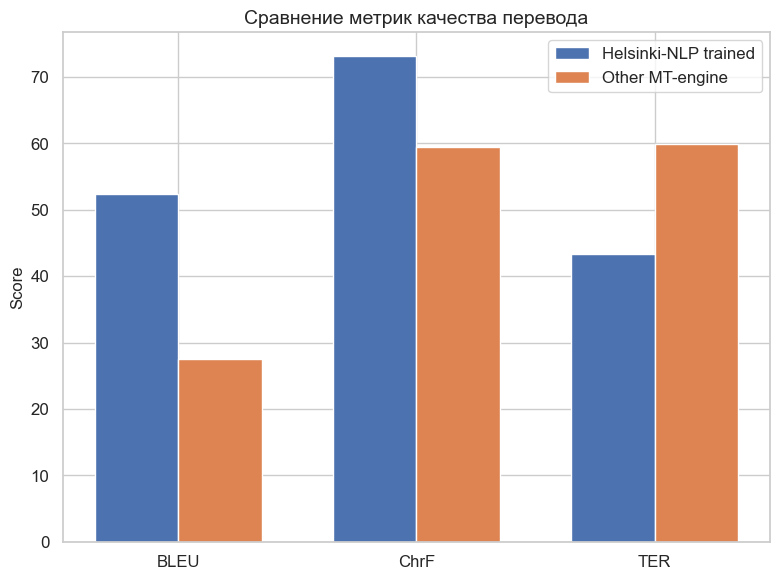

✅ Сохранено:
📈 C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\aggregated_metrics_by_system.png
📘 C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\aggregated_metrics.xlsx
📄 C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\aggregated_metrics.csv


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import evaluate
import os

# === 1. Загрузка данных ===
df = pd.read_excel(r"C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\Human_eval_pharma_50_result.xlsx")
output_dir = r"C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval"
os.makedirs(output_dir, exist_ok=True)

# === 2. Подготовка данных ===
references = df[""].astype(str).tolist()
pred_mt1 = df["mt_system_1"].astype(str).tolist()
pred_mt2 = df["mt_system_2"].astype(str).tolist()

# === 3. Расчёт метрик ===
bleu = evaluate.load("sacrebleu")
chrf = evaluate.load("chrf")
ter = evaluate.load("ter")

metrics_results = {
    "BLEU": [
        bleu.compute(predictions=pred_mt1, references=references)["score"],
        bleu.compute(predictions=pred_mt2, references=references)["score"]
    ],
    "ChrF": [
        chrf.compute(predictions=pred_mt1, references=references)["score"],
        chrf.compute(predictions=pred_mt2, references=references)["score"]
    ],
    "TER": [
        ter.compute(predictions=pred_mt1, references=references)["score"],
        ter.compute(predictions=pred_mt2, references=references)["score"]
    ]
}

# === 4. Построение графика ===
labels = ["BLEU", "ChrF", "TER"]
mt1_scores = [metrics_results[m][0] for m in labels]
mt2_scores = [metrics_results[m][1] for m in labels]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar([i - width/2 for i in x], mt1_scores, width, label="Helsinki-NLP trained")
bar2 = ax.bar([i + width/2 for i in x], mt2_scores, width, label="Other MT-engine")

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Сравнение метрик качества перевода", fontsize=14)
ax.legend()
plt.tight_layout()

# Сохранение графика
plot_path = os.path.join(output_dir, "aggregated_metrics_by_system.png")
plt.savefig(plot_path, dpi=300)
plt.show()

# === 5. Сохранение таблиц ===
summary_df = pd.DataFrame(metrics_results).T
summary_df.columns = ["Helsinki-NLP trained", "Other MT-engine"]
excel_path = os.path.join(output_dir, "aggregated_metrics.xlsx")
csv_path = os.path.join(output_dir, "aggregated_metrics.csv")

summary_df.to_excel(excel_path)
summary_df.to_csv(csv_path)

print(f"✅ Сохранено:\n📈 {plot_path}\n📘 {excel_path}\n📄 {csv_path}")


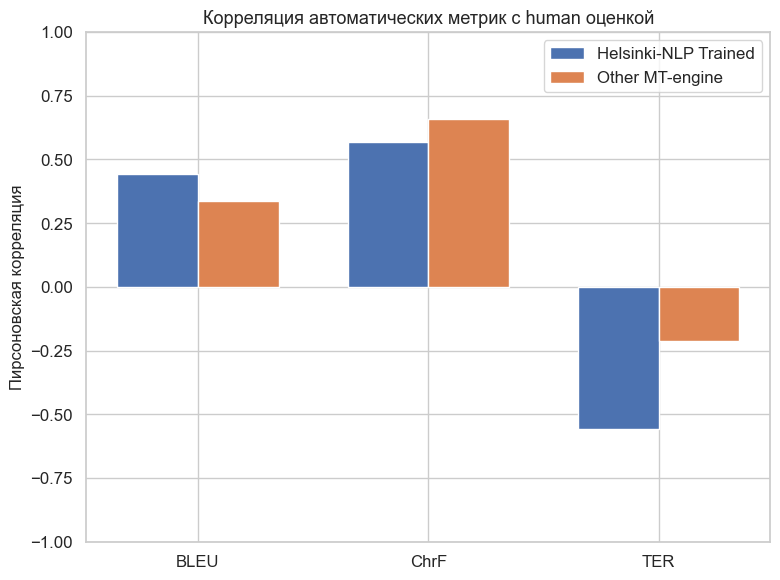

✅ График сохранён в: C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\metric_human_corr_barplot_fixed.png


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === 1. Загрузка файла ===
file_path = r"C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\Human_eval_pharma_50_result_metrics_calc.xlsx"  # Замените на свой путь
df = pd.read_excel(file_path)

# === 2. Переименование колонок для ясности ===
df = df.rename(columns={
    'BLEU_mt1': 'BLEU_Helsinki',
    'ChrF_mt1': 'ChrF_Helsinki',
    'TER_mt1': 'TER_Helsinki',
    'average_mt_1': 'Human_Helsinki',
    
    'BLEU_mt2': 'BLEU_Other',
    'ChrF_mt2': 'ChrF_Other',
    'TER_mt2': 'TER_Other',
    'average_mt_2': 'Human_Other',
})

# === 3. Расчёт корреляций (по Пирсону) ===
systems = ['Helsinki', 'Other']
metrics = ['BLEU', 'ChrF', 'TER']

correlations = []
for system in systems:
    for metric in metrics:
        try:
            score_corr = df[f"{metric}_{system}"].corr(df[f"Human_{system}"])
            correlations.append({
                "System": f"{'Helsinki-NLP Trained' if system == 'Helsinki' else 'Other MT-engine'}",
                "Metric": metric,
                "Correlation": score_corr
            })
        except Exception as e:
            print(f"Ошибка при обработке {system}, {metric}: {e}")

cor_df = pd.DataFrame(correlations)

# === 4. Построение столбчатой диаграммы ===
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(metrics))

for i, system in enumerate(cor_df["System"].unique()):
    subset = cor_df[cor_df["System"] == system]
    positions = [p + i * bar_width for p in x]
    plt.bar(positions, subset["Correlation"], width=bar_width, label=system)

plt.xticks([p + bar_width / 2 for p in x], metrics, fontsize=12)
plt.ylabel("Пирсоновская корреляция", fontsize=12)
plt.title("Корреляция автоматических метрик с human оценкой", fontsize=13)
plt.ylim(-1, 1)
plt.legend()
plt.tight_layout()

# === 5. Сохранение графика ===
output_path = r"C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\metric_human_corr_barplot_fixed.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"✅ График сохранён в: {output_path}")


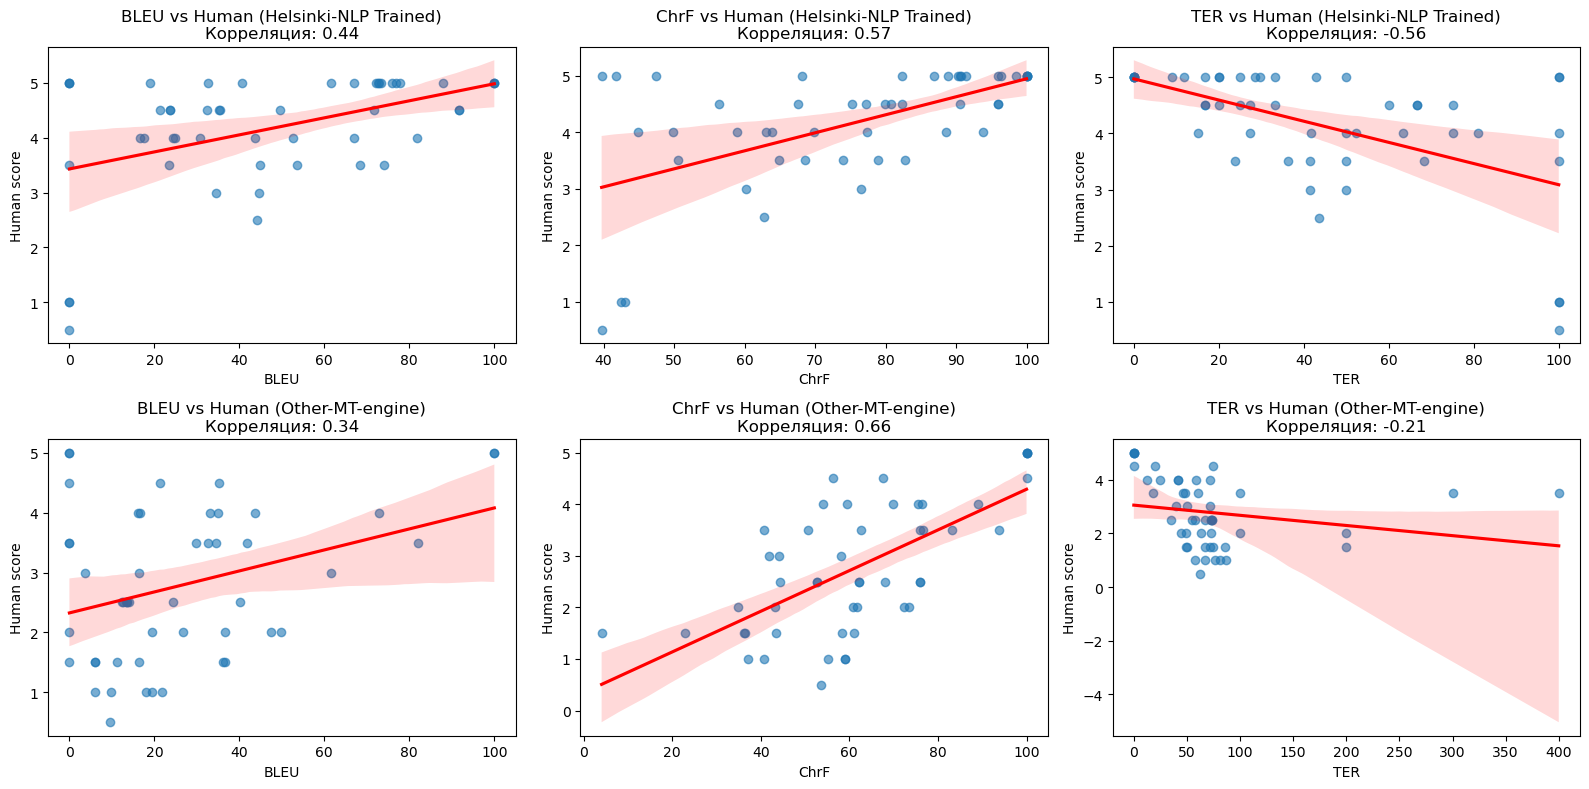

✅ График сохранён в: C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\metric_human_correlation_scatter.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Загрузка данных ===
path = r"C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\Human_eval_pharma_50_result_metrics_calc.xlsx"
df = pd.read_excel(path)

# Удалим пробелы в названиях колонок
df.columns = [col.strip() for col in df.columns]

# === Настройки ===
systems = {
    'Helsinki-NLP Trained': {
        'BLEU': 'BLEU_mt1',
        'ChrF': 'ChrF_mt1',
        'TER': 'TER_mt1',
        'human': 'average_mt_1'
    },
    'Other-MT-engine': {
        'BLEU': 'BLEU_mt2',
        'ChrF': 'ChrF_mt2',
        'TER': 'TER_mt2',
        'human': 'average_mt_2'
    }
}

# === Построение графиков ===
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
plt.subplots_adjust(hspace=0.3)

for row_idx, (system_name, metric_map) in enumerate(systems.items()):
    for col_idx, metric in enumerate(['BLEU', 'ChrF', 'TER']):
        ax = axes[row_idx, col_idx]
        metric_col = metric_map[metric]
        human_col = metric_map['human']

        # Построение регрессионной линии
        sns.regplot(
            x=df[metric_col],
            y=df[human_col],
            ax=ax,
            scatter_kws={'alpha': 0.6},
            line_kws={"color": "red"}
        )

        # Расчёт корреляции
        corr = df[metric_col].corr(df[human_col])
        ax.set_title(f"{metric} vs Human ({system_name})\nКорреляция: {corr:.2f}")
        ax.set_xlabel(metric)
        ax.set_ylabel("Human score")

# === Сохранение ===
save_path = r"C:\Users\Iriniya\Desktop\тематики_перевод\hum_eval\metric_human_correlation_scatter.png"
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ График сохранён в: {save_path}")
